# Learning pandas

Here is one way of getting the solution. There are others, feel free to
share yours.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = "https://www.gov.scot/binaries/content/documents/govscot/publications/statistics/2020/01/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/documents/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/govscot%3Adocument/SIMD%2B2020v2%2B-%2Branks.xlsx"

In [3]:
simd = pd.read_excel(url, sheet_name="SIMD 2020v2 ranks")

**Which data zone is the most deprived (lowest ranking?) Which council
area is it?**

In [4]:
simd.sort_values("SIMD2020v2_Rank")

6976 rows × 13 columns

You can read the value from the table or extract it using `iloc`, which
works like `loc` but based on a position.

In [5]:
simd.sort_values("SIMD2020v2_Rank").iloc[0]["Council_area"]

'Inverclyde'

**Can you add a column with a proportion of the working age population
in each data zone?**

In [6]:
simd["working_proportion"] = simd["Working_age_population"] / simd["Total_population"]

**Which council area is, on average, the least deprived based on the
Income domain?**

In [7]:
simd.groupby("Council_area")["SIMD2020v2_Income_Domain_Rank"].mean().sort_values(ascending=False).head(1)

Council_area
East Renfrewshire    4852.442623
Name: SIMD2020v2_Income_Domain_Rank, dtype: float64

**What is the total population of the “Glasgow City” council?**

In [8]:
simd.groupby("Council_area")["Total_population"].sum()["Glasgow City"]

621020

**Can you plot the ranking distribution in “Glasgow City”? How does it
compare to the “City of Edinburgh”?**

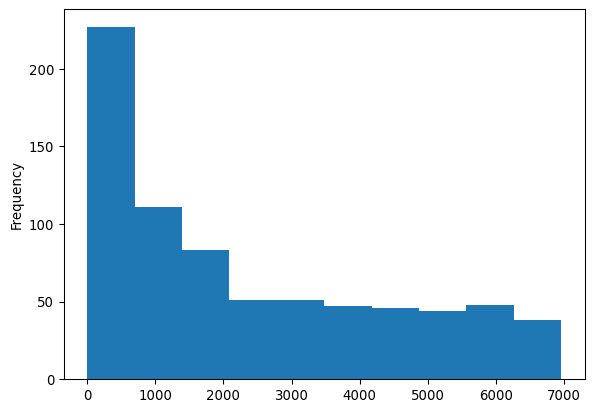

In [9]:
glasgow = simd.query("Council_area == 'Glasgow City'")
glasgow["SIMD2020v2_Rank"].plot.hist()

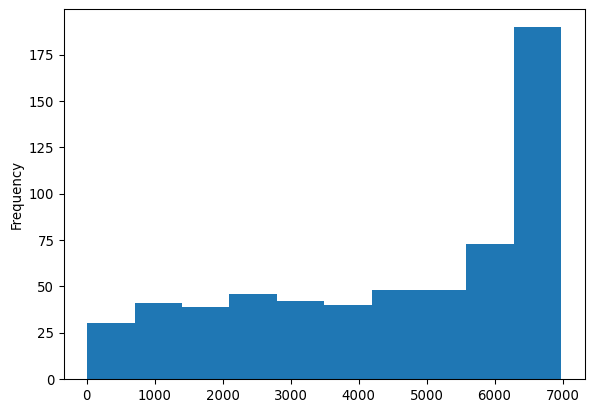

In [10]:
edinburgh = simd.query("Council_area == 'City of Edinburgh'")
edinburgh["SIMD2020v2_Rank"].plot.hist()

Or using `seaborn`.

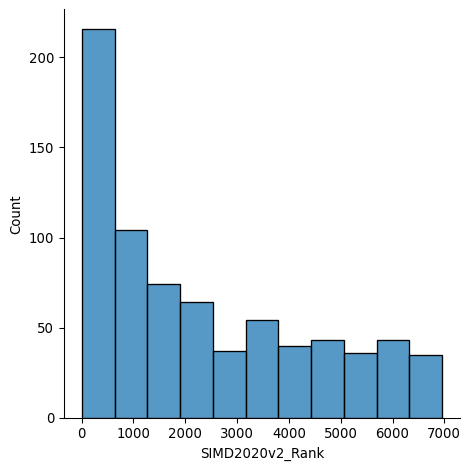

In [11]:
sns.displot(glasgow["SIMD2020v2_Rank"])

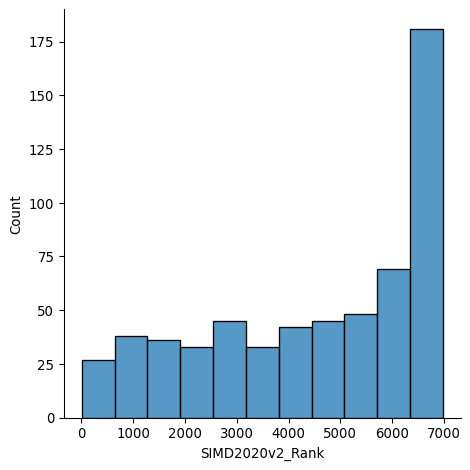

In [12]:
sns.displot(edinburgh["SIMD2020v2_Rank"])

**Can you figure out how to create a scatter plot of a relationship
between the education and health domain rankings?**

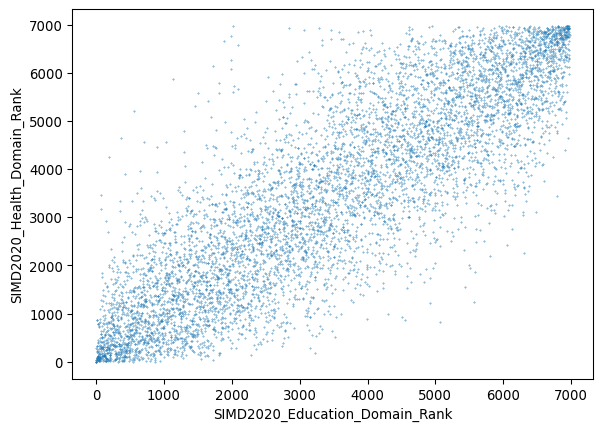

In [13]:
simd.plot.scatter("SIMD2020_Education_Domain_Rank", "SIMD2020_Health_Domain_Rank", s=.1)

Or using `seaborn`.

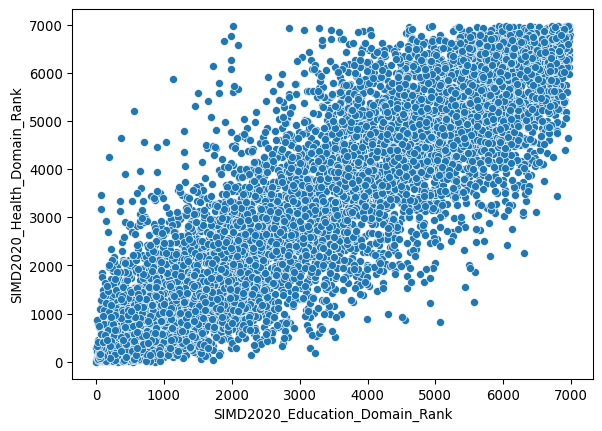

In [14]:
sns.scatterplot(x="SIMD2020_Education_Domain_Rank", y="SIMD2020_Health_Domain_Rank", data=simd)

**What else can you derive from the data?**

Plenty :).